In [1]:
%pylab inline
from constant import *

Populating the interactive namespace from numpy and matplotlib


### State 
$$x = [w,n,m,s,e,o]$$   
$w$: wealth level    size: 20   
$n$: 401k level      size: 10   
$m$: mortgage level  size: 10   
$s$: economic state  size: 8   
$e$: employment state size: 2   
$o$: housing state:  size: 2   

### Action
$c$: consumption amount size: 20   
$b$: bond investment size: 20   
$k$: stock investment derived from budget constrain once $c$ and $b$ are determined.    
$h$: housing consumption size, related to housing status and consumption level   

If $O = 1$, the agent owns a house:    
$A = [c, b, k, h=H, action = 1]$ sold the house    
$A = [c, b, k, h=H, action = 0]$ keep the house   

If $O = 0$, the agent do not own a house:   
$A = [c, b, k, h= \frac{c}{\alpha} \frac{1-\alpha}{pr}, action = 0]$ keep renting the house   
$A = [c, b, k, h= \frac{c}{\alpha} \frac{1-\alpha}{pr}, action = 1]$ buy a housing with H unit     

### Housing
20% down payment of mortgage, fix mortgage rate, single housing unit available, from age between 20 and 50, agents could choose to buy a house, and could choose to sell the house at any moment.  $H = 1000$ 

In [2]:
gamma

3

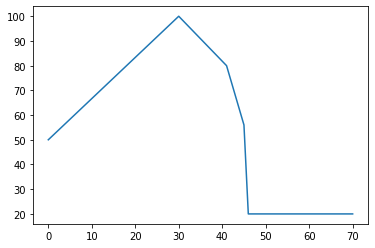

In [3]:
plt.plot(detEarning)

In [4]:
%%time
for t in tqdm(range(T_max-1,T_min-1, -1)):
    if t == T_max-1:
        v,cbkha = vmap(partial(V,t,Vgrid[:,:,:,:,:,:,t]))(Xs)
    else:
        v,cbkha = vmap(partial(V,t,Vgrid[:,:,:,:,:,:,t+1]))(Xs)
    Vgrid[:,:,:,:,:,:,t] = v.reshape(dim)
    cgrid[:,:,:,:,:,:,t] = cbkha[:,0].reshape(dim)
    bgrid[:,:,:,:,:,:,t] = cbkha[:,1].reshape(dim)
    kgrid[:,:,:,:,:,:,t] = cbkha[:,2].reshape(dim)
    hgrid[:,:,:,:,:,:,t] = cbkha[:,3].reshape(dim)
    agrid[:,:,:,:,:,:,t] = cbkha[:,4].reshape(dim)

100%|██████████| 60/60 [54:34<00:00, 54.57s/it]

CPU times: user 1d 3h 56min 26s, sys: 2h 45min 39s, total: 1d 6h 42min 6s
Wall time: 54min 34s


In [5]:
np.save("ValueGamma3HugeCost25",Vgrid)